https://kaen2891.tistory.com/39


나는 window length 를 0.025로 두고, stride는 0.010로 진행하여 0.01초마다 frequency를 뽑을 것이다.

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

frame_length = 0.025
frame_stride = 0.010




In [3]:
def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()

    return S

Wav length: 1411.40175, Mel_S shape:(40, 141141)


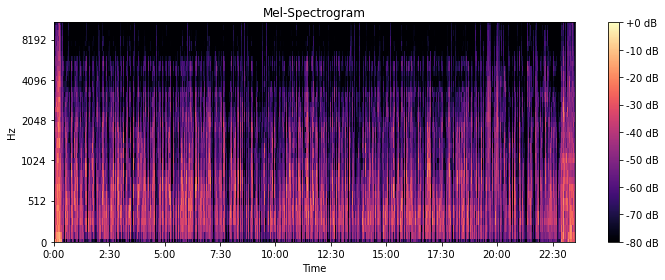

In [4]:
data1 = 'C:/Users/HAPPY//Desktop/Tedwav/A roadmap to end aging _ Aubrey de Grey.wav'
mel_spec1 = Mel_S(data1)



Wav length: 1094.159125, Mel_S shape:(40, 109416)


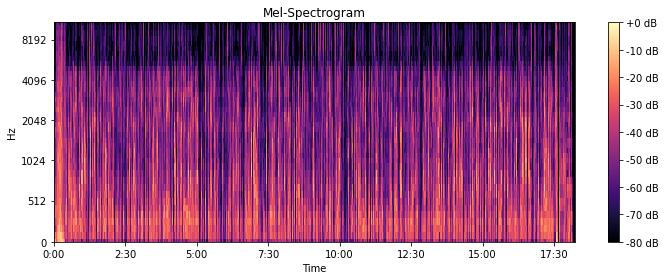

In [5]:
data2 = 'C:/Users/HAPPY//Desktop/Tedwav/Alex Steffen - The route to a sustainable future.wav'
mel_spec2 = Mel_S(data2)



In [6]:
mels=[mel_spec1,mel_spec2]

In [17]:
a=['a',mels[0]]
b=['b',mels[1]]

mels=[a,b]

In [18]:
mels

[['a',
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])],
 ['b',
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])]]

In [19]:
import pickle

In [20]:
with open('mel.pkl', 'wb') as f:
    pickle.dump(mels, f)